# Import Modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns;
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import mutual_info_regression

from imblearn.over_sampling import RandomOverSampler

pd.set_option('display.max_columns', 28)

# Raw Dataset

In [2]:
raw_df = pd.read_csv("../datasets/raw_telco_customer_churn.csv")
raw_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Oversampling dataset

## Initialize random oversampling sample function

In [3]:
random_over_sampler = RandomOverSampler(random_state=42)

## Resampling dataset

In [4]:
X_raw = raw_df.iloc[:, 0:20]
y_raw = raw_df.iloc[:, 20:21]

X_ros_raw, y_ros_raw = random_over_sampler.fit_resample(X_raw, y_raw)

X_ros_raw_train, X_ros_raw_test, y_ros_raw_train, y_ros_raw_test = train_test_split(X_ros_raw, y_ros_raw, test_size=0.2, random_state=42)

## Concate X_ros_raw and y_ros_raw

In [5]:
ros_raw_df = pd.concat([X_ros_raw, y_ros_raw], axis=1)

## Save oversampling dataset

In [6]:
ros_raw_df.to_csv('../datasets/raw_oversampling_telco_customer_churn.csv', index=False)

# Data Cleaning

## Rename column

In [7]:
raw_rename_columns_df = ros_raw_df.rename(columns={'customerID' : 'customer_id',
                                               'SeniorCitizen' : 'senior_citizen',
                                               'Partner' : 'partner',
                                               'Dependents' : 'dependents',
                                               'PhoneService' : 'phone_service',
                                               'MultipleLines' : 'multiple_lines',
                                               'InternetService' : 'internet_service',
                                               'OnlineSecurity' : 'online_security',
                                               'OnlineBackup' : 'online_backup',
                                               'DeviceProtection' : 'device_protection',
                                               'TechSupport' : 'tech_support',
                                               'StreamingTV' : 'streaming_tv',
                                               'StreamingMovies' : 'streaming_movies',
                                               'Contract' : 'contract',
                                               'PaperlessBilling' : 'paperless_billing',
                                               'PaymentMethod' : 'payment_method',
                                               'MonthlyCharges' : 'monthly_charges',
                                               'TotalCharges' : 'total_charges',
                                               'Churn' : 'churn'})

In [8]:
raw_rename_columns_df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Replace Value
Pada fitur multiple_lines, online_security, online_backup, device_protection, tech_support, streaming_movies, dan streaming_tv, nilainya tidak sesuai. Nilai yang seharusnya terisi berupa Yes atau No, tetapi ada nilai lain yang terisi yaitu No internet service dan No phone service. Kemungkinan hal ini terjadi karena salah saat memasukkan data.

In [9]:
replace_value_df = raw_rename_columns_df.replace({'No internet service' : 'No', 'No phone service' : 'No' })

In [10]:
replace_value_df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Outlier

### tenure
Tidak ada outlier

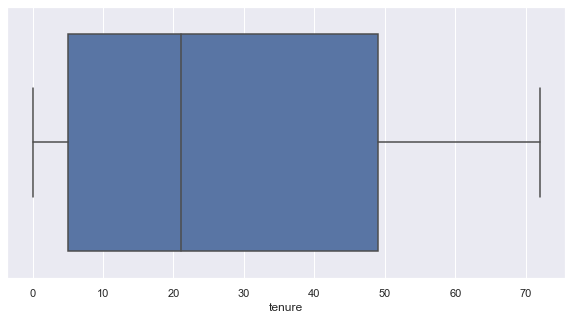

In [11]:
sns.set(rc={'figure.figsize':(10, 5)})
ax = sns.boxplot(x=replace_value_df["tenure"])

### monthly_charges
Tidak ada outlier

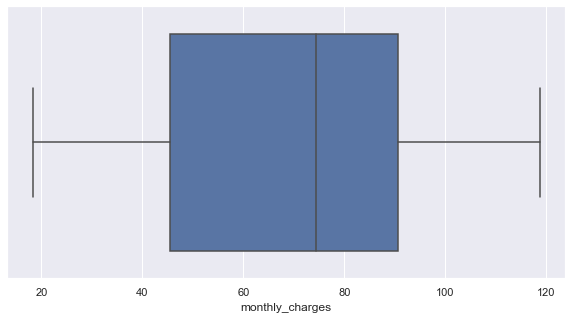

In [12]:
sns.set(rc={'figure.figsize':(10, 5)})
ax = sns.boxplot(x=replace_value_df["monthly_charges"])

### total_charges
Terdapat outlier yang terletak di atas nilai maksimum.

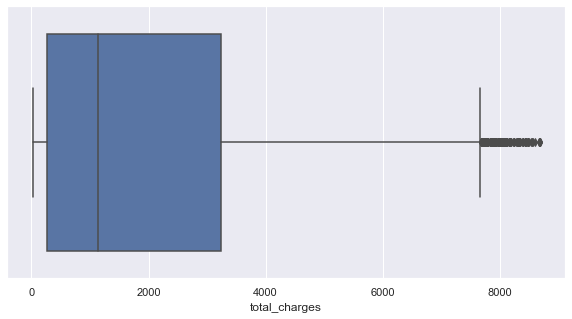

In [13]:
sns.set(rc={'figure.figsize':(10, 5)})
ax = sns.boxplot(x=pd.to_numeric(replace_value_df['total_charges'], errors='coerce'))

## Missing Value

In [14]:
replace_value_df.isna().sum().to_frame().rename(columns={0 : 'Number of Missing Value (%)'})

,Number of Missing Value (%)
customer_id,0
gender,0
senior_citizen,0
partner,0
dependents,0
tenure,0
phone_service,0
multiple_lines,0
internet_service,0
online_security,0


## Duplicate Value

In [15]:
print(f'Number of duplicate value : {replace_value_df.duplicated().sum()}')

Number of duplicate value : 3305


## Mismatch Value
Pada fitur total_charges datatype nya adalah object yang seharusnya float.

In [16]:
replace_value_df.dtypes.to_frame().rename(columns={0 : 'Datatype'})

,Datatype
customer_id,object
gender,object
senior_citizen,int64
partner,object
dependents,object
tenure,int64
phone_service,object
multiple_lines,object
internet_service,object
online_security,object


In [17]:
replace_value_df['total_charges'] = pd.to_numeric(replace_value_df['total_charges'], errors='coerce')
raw_mismatch_value_df = replace_value_df

In [18]:
raw_mismatch_value_df.dtypes.to_frame().rename(columns={0 : 'Datatype'})

,Datatype
customer_id,object
gender,object
senior_citizen,int64
partner,object
dependents,object
tenure,int64
phone_service,object
multiple_lines,object
internet_service,object
online_security,object


# Feature Engineering

## Feature Transformation

In [19]:
feature_tranformation_df = raw_mismatch_value_df

### Binary Lable

#### gender

In [20]:
gender_lb = preprocessing.LabelBinarizer()
gender_lb.fit(feature_tranformation_df['gender'])
gender_lb.classes_

array(['Female', 'Male'], dtype='<U6')

In [21]:
feature_tranformation_df['gender'] = gender_lb.transform(raw_mismatch_value_df['gender'])

#### partner

In [22]:
partner_lb = preprocessing.LabelBinarizer()
partner_lb.fit(feature_tranformation_df['partner'])
partner_lb.classes_

array(['No', 'Yes'], dtype='<U3')

In [23]:
feature_tranformation_df['partner'] = gender_lb.transform(raw_mismatch_value_df['partner'])

#### dependents

In [24]:
dependents_lb = preprocessing.LabelBinarizer()
dependents_lb.fit(feature_tranformation_df['dependents'])
dependents_lb.classes_

array(['No', 'Yes'], dtype='<U3')

In [25]:
feature_tranformation_df['dependents'] = gender_lb.transform(raw_mismatch_value_df['dependents'])

#### phone_service

In [26]:
phone_service_lb = preprocessing.LabelBinarizer()
phone_service_lb.fit(feature_tranformation_df['phone_service'])
phone_service_lb.classes_

array(['No', 'Yes'], dtype='<U3')

In [27]:
feature_tranformation_df['phone_service'] = gender_lb.transform(raw_mismatch_value_df['phone_service'])

#### multiple_lines

In [28]:
multiple_lines_lb = preprocessing.LabelBinarizer()
multiple_lines_lb.fit(feature_tranformation_df['multiple_lines'])
multiple_lines_lb.classes_

array(['No', 'Yes'], dtype='<U3')

In [29]:
feature_tranformation_df['multiple_lines'] = multiple_lines_lb.transform(raw_mismatch_value_df['phone_service'])

C:\Users\62821\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


#### online_security

In [30]:
online_security_lb = preprocessing.LabelBinarizer()
online_security_lb.fit(feature_tranformation_df['online_security'])
online_security_lb.classes_

array(['No', 'Yes'], dtype='<U3')

In [31]:
feature_tranformation_df['online_security'] = online_security_lb.transform(raw_mismatch_value_df['online_security'])

#### online_backup

In [32]:
online_backup_lb = preprocessing.LabelBinarizer()
online_backup_lb.fit(feature_tranformation_df['online_backup'])
online_backup_lb.classes_

array(['No', 'Yes'], dtype='<U3')

In [33]:
feature_tranformation_df['online_backup'] = online_backup_lb.transform(raw_mismatch_value_df['online_backup'])

#### device_protection

In [34]:
device_protection_lb = preprocessing.LabelBinarizer()
device_protection_lb.fit(feature_tranformation_df['device_protection'])
device_protection_lb.classes_

array(['No', 'Yes'], dtype='<U3')

In [35]:
feature_tranformation_df['device_protection'] = device_protection_lb.transform(raw_mismatch_value_df['device_protection'])

#### tech_support

In [36]:
tech_support_lb = preprocessing.LabelBinarizer()
tech_support_lb.fit(feature_tranformation_df['tech_support'])
tech_support_lb.classes_

array(['No', 'Yes'], dtype='<U3')

In [37]:
feature_tranformation_df['tech_support'] = tech_support_lb.transform(raw_mismatch_value_df['tech_support'])

#### streaming_tv

In [38]:
streaming_tv_lb = preprocessing.LabelBinarizer()
streaming_tv_lb.fit(feature_tranformation_df['streaming_tv'])
streaming_tv_lb.classes_

array(['No', 'Yes'], dtype='<U3')

In [39]:
feature_tranformation_df['streaming_tv'] = streaming_tv_lb.transform(raw_mismatch_value_df['streaming_tv'])

#### streaming_movies

In [40]:
streaming_movies_lb = preprocessing.LabelBinarizer()
streaming_movies_lb.fit(feature_tranformation_df['streaming_movies'])
streaming_movies_lb.classes_

array(['No', 'Yes'], dtype='<U3')

In [41]:
feature_tranformation_df['streaming_movies'] = streaming_movies_lb.transform(raw_mismatch_value_df['streaming_movies'])

#### paperless_billing

In [42]:
paperless_billing_lb = preprocessing.LabelBinarizer()
paperless_billing_lb.fit(feature_tranformation_df['paperless_billing'])
paperless_billing_lb.classes_

array(['No', 'Yes'], dtype='<U3')

In [43]:
feature_tranformation_df['paperless_billing'] = paperless_billing_lb.transform(raw_mismatch_value_df['paperless_billing'])

#### churn

In [44]:
churn_lb = preprocessing.LabelBinarizer()
churn_lb.fit(feature_tranformation_df['churn'])
churn_lb.classes_

array(['No', 'Yes'], dtype='<U3')

In [45]:
feature_tranformation_df['churn'] = churn_lb.transform(raw_mismatch_value_df['churn'])

#### After Labeling in Binary

In [46]:
feature_tranformation_df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,7590-VHVEG,0,0,0,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,0,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,0,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,0,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


### One Hot Encoding

In [47]:
feature_tranformation_df

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,7590-VHVEG,0,0,0,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,0,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,0,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,0,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10343,7623-TRNQN,1,0,0,0,1,0,0,DSL,0,0,0,1,0,0,Month-to-month,1,Mailed check,49.90,49.90,1
10344,8580-AECUZ,1,1,0,0,1,0,0,Fiber optic,0,0,0,0,1,0,Month-to-month,1,Electronic check,79.10,79.10,1
10345,0661-XEYAN,0,1,0,0,1,0,0,DSL,0,0,0,0,0,0,Month-to-month,1,Mailed check,25.80,25.80,1
10346,0362-ZBZWJ,1,0,0,0,36,0,0,Fiber optic,0,0,0,0,0,1,Month-to-month,1,Electronic check,84.90,3067.20,1


#### Select feature with type object

In [48]:
object_features = (feature_tranformation_df.dtypes == 'object') == True
object_cols     = list(object_features[object_features].index)
object_cols

['customer_id', 'internet_service', 'contract', 'payment_method']

#### One Hot Encoder

In [49]:
one_hot_encoder   = OneHotEncoder(handle_unknown='ignore', sparse=False)
one_hot_encode_df = pd.DataFrame(one_hot_encoder.fit_transform(feature_tranformation_df[object_cols[1:11]]))

In [50]:
a = feature_tranformation_df['internet_service'].unique()
np.sort(a, axis=None)

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [51]:
b = feature_tranformation_df['contract'].unique()
np.sort(b, axis=None)

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [52]:
c = feature_tranformation_df['payment_method'].unique()
np.sort(c, axis=None)

array(['Bank transfer (automatic)', 'Credit card (automatic)',
       'Electronic check', 'Mailed check'], dtype=object)

In [53]:
one_hot_encode_df = one_hot_encode_df.rename(columns={
                                                0 : 'internet_service_DSL',
                                                1 : 'internet_service_fiber_optic',
                                                2 : 'no_internet_service',
                                                3 : 'contract_month_to_month',
                                                4 : 'contract_one_year',
                                                5 : 'contract_two_year',
                                                6 : 'payment_method_bank_transfer_automatic',
                                                7 : 'payment_method_credit_card_automatic',
                                                8 : 'payment_method_electronic_check',
                                                9 : 'payment_method_mailed_check'
                                            })

one_hot_encode_df.head()

,internet_service_DSL,internet_service_fiber_optic,no_internet_service,contract_month_to_month,contract_one_year,contract_two_year,payment_method_bank_transfer_automatic,payment_method_credit_card_automatic,payment_method_electronic_check,payment_method_mailed_check
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


#### Drop column internet_service, contract, payment_method

In [54]:
feature_tranformation_drop_df = feature_tranformation_df.drop(['internet_service', 'contract', 'payment_method'], axis=1)
feature_tranformation_drop_df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn
0,7590-VHVEG,0,0,0,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,0,0,1,0,1,0,0,0,0,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,0,0,1,1,0,0,0,0,1,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,0,0,0,0,0,0,0,0,1,70.70,151.65,1


#### Concate one hot encoding dataframe

In [55]:
one_hot_encode_final_df = pd.concat([feature_tranformation_drop_df, one_hot_encode_df], axis=1)
one_hot_encode_final_df = one_hot_encode_final_df[['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
                                                   'phone_service', 'multiple_lines', 'online_security',
                                                   'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
                                                   'streaming_movies', 'paperless_billing', 'internet_service_DSL', 
                                                   'internet_service_fiber_optic', 'no_internet_service',
                                                   'contract_month_to_month', 'contract_one_year',
                                                   'contract_two_year', 'payment_method_bank_transfer_automatic',
                                                   'payment_method_credit_card_automatic', 'payment_method_electronic_check',
                                                   'payment_method_mailed_check', 'tenure', 'monthly_charges',
                                                   'total_charges', 'churn']]

one_hot_encode_final_df.head()

,customer_id,gender,senior_citizen,partner,dependents,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,internet_service_DSL,internet_service_fiber_optic,no_internet_service,contract_month_to_month,contract_one_year,contract_two_year,payment_method_bank_transfer_automatic,payment_method_credit_card_automatic,payment_method_electronic_check,payment_method_mailed_check,tenure,monthly_charges,total_charges,churn
0,7590-VHVEG,0,0,0,0,0,0,0,1,0,0,0,0,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,0,0,1,0,1,0,0,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,34,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,0,0,1,1,0,0,0,0,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,0,0,1,0,1,1,0,0,0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,45,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2,70.70,151.65,1


### New feature

#### total_charges
Nilai dari feature tidak sesuai tidak sesuai dengan hasil kalkulasi dari tenure * monthly_charges. Maka akan dibuat dibuat fitur baru dari hasil perkalian tenure dan monthly_charges

In [56]:
one_hot_encode_final_df.head().drop(['total_charges'], axis=1).head()

,customer_id,gender,senior_citizen,partner,dependents,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,internet_service_DSL,internet_service_fiber_optic,no_internet_service,contract_month_to_month,contract_one_year,contract_two_year,payment_method_bank_transfer_automatic,payment_method_credit_card_automatic,payment_method_electronic_check,payment_method_mailed_check,tenure,monthly_charges,churn
0,7590-VHVEG,0,0,0,0,0,0,0,1,0,0,0,0,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1,29.85,0
1,5575-GNVDE,1,0,0,0,0,0,1,0,1,0,0,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,34,56.95,0
2,3668-QPYBK,1,0,0,0,0,0,1,1,0,0,0,0,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2,53.85,1
3,7795-CFOCW,1,0,0,0,0,0,1,0,1,1,0,0,0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,45,42.30,0
4,9237-HQITU,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2,70.70,1


In [57]:
one_hot_encode_final_df['total_charges'] = one_hot_encode_final_df['tenure'] * one_hot_encode_final_df['monthly_charges']

In [58]:
new_feature_df = one_hot_encode_final_df[['customer_id', 'gender', 'senior_citizen', 'partner',
                         'dependents', 'phone_service', 'multiple_lines', 'online_security', 
                         'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
                         'streaming_movies', 'paperless_billing', 'internet_service_DSL', 
                         'internet_service_fiber_optic', 'no_internet_service', 'contract_month_to_month',
                         'contract_one_year', 'contract_two_year', 'payment_method_bank_transfer_automatic',
                         'payment_method_credit_card_automatic', 'payment_method_electronic_check',
                         'payment_method_mailed_check', 'tenure', 'monthly_charges',
                         'total_charges', 'churn']]

new_feature_df.head()

,customer_id,gender,senior_citizen,partner,dependents,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,internet_service_DSL,internet_service_fiber_optic,no_internet_service,contract_month_to_month,contract_one_year,contract_two_year,payment_method_bank_transfer_automatic,payment_method_credit_card_automatic,payment_method_electronic_check,payment_method_mailed_check,tenure,monthly_charges,total_charges,churn
0,7590-VHVEG,0,0,0,0,0,0,0,1,0,0,0,0,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,0,0,1,0,1,0,0,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,34,56.95,1936.30,0
2,3668-QPYBK,1,0,0,0,0,0,1,1,0,0,0,0,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2,53.85,107.70,1
3,7795-CFOCW,1,0,0,0,0,0,1,0,1,1,0,0,0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,45,42.30,1903.50,0
4,9237-HQITU,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2,70.70,141.40,1


### Save dataset

In [59]:
new_feature_df.to_csv('../datasets/oversampling/EDA_telco_customer_churn.csv', index=False)

## Feature Extraction

### Principal Component Analysis

#### Classification model

In [60]:
feature_extraction_classification_df = new_feature_df.drop(['customer_id', 'churn'], axis=1)

In [61]:
pca_classification = PCA(n_components=26)
pca_classification.fit(feature_extraction_classification_df)

PCA(n_components=26)

In [62]:
for component, explained_variance_ratio in enumerate(pca_classification.explained_variance_ratio_):
    print(f'{component + 1} component : {(explained_variance_ratio * 100):.4f}%')

1 component : 99.9853%
2 component : 0.0131%
3 component : 0.0016%
4 component : 0.0000%
5 component : 0.0000%
6 component : 0.0000%
7 component : 0.0000%
8 component : 0.0000%
9 component : 0.0000%
10 component : 0.0000%
11 component : 0.0000%
12 component : 0.0000%
13 component : 0.0000%
14 component : 0.0000%
15 component : 0.0000%
16 component : 0.0000%
17 component : 0.0000%
18 component : 0.0000%
19 component : 0.0000%
20 component : 0.0000%
21 component : 0.0000%
22 component : 0.0000%
23 component : 0.0000%
24 component : 0.0000%
25 component : 0.0000%
26 component : 0.0000%


Dengan 1 component, explained variance yang dihasilkan sebesar 99.986%. Sehingga berhasil mereduksi dimensi sebanyak 18 dimensi, yang dimana dimensi awal sebanyak 26 dimensi.

##### Explained Variance Ratio Plot

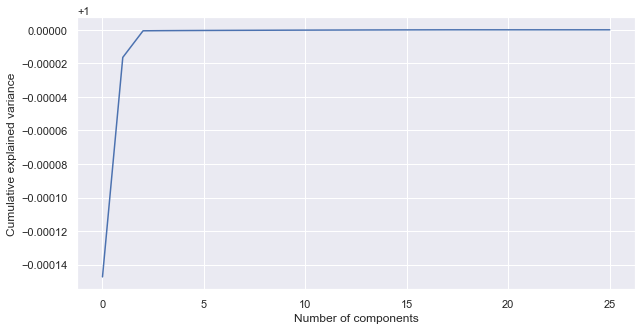

In [63]:
pca_classification = PCA().fit(feature_extraction_classification_df)

plt.plot(np.cumsum(pca_classification.explained_variance_ratio_))

plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');

##### Show Component in Table

In [64]:
pca_classification = PCA()

X_pca_classification = pca_classification.fit_transform(feature_extraction_classification_df)

component_names = [f"PC{i+1}" for i in range(X_pca_classification.shape[1])]
X_pca_classification = pd.DataFrame(X_pca_classification, columns=component_names)

X_pca_classification.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26
0,-1999.805941,18.036767,-15.660135,0.160514,1.191116,-0.643577,0.207543,0.133132,0.049203,0.369359,0.010071,0.161181,-0.733079,-0.099390,0.058633,0.141732,0.021711,-0.144130,0.264221,-2.450996e-13,1.373875e-13,6.061617e-14,3.591796e-13,1.099435e-13,-1.929908e-13,-3.486388e-13
1,-92.977228,12.131262,2.882413,1.086146,-0.389184,0.691236,-0.126441,-0.563328,-0.054500,0.679051,0.343528,0.014464,0.946075,-0.441743,-0.610119,0.242230,-0.179932,-0.352403,-0.084372,-6.186510e-13,2.751648e-12,-2.633496e-12,1.431403e-13,2.754543e-14,7.723056e-14,-2.713747e-13
2,-1921.768147,-3.532008,-6.641649,0.999472,0.091808,0.341566,0.956942,0.131494,0.020490,0.281383,0.866467,0.123173,-0.075031,0.176350,-0.217712,0.614211,-0.196614,-0.010766,-0.079330,3.060293e-12,1.409119e-11,1.536038e-11,5.881710e-12,3.467196e-12,7.761393e-14,1.445383e-13
3,-125.782936,29.713946,7.970814,1.269435,-0.088610,0.568131,0.025497,-0.046789,-0.674145,0.762571,-0.612877,-0.385612,0.663829,-0.475318,-0.105453,-0.289444,0.001880,0.353272,0.317588,-8.773866e-13,-5.633910e-12,-3.370421e-12,1.681713e-11,9.912740e-12,8.065371e-12,1.695115e-13
4,-1887.941499,-19.052507,-0.685890,-0.572810,0.165272,-0.550591,0.068026,-0.117391,0.049100,0.225904,-0.034462,-0.506818,-0.107938,-0.126764,-0.045715,-0.025985,0.084843,-0.217813,0.065468,6.738410e-13,9.307675e-13,2.019666e-12,-9.578503e-13,-1.206485e-11,1.841385e-11,-3.422645e-13


##### Factor Loading

In [65]:
factor_loadings = pd.DataFrame(
    pca_classification.components_.T,
    
    columns = component_names,
    index   = feature_extraction_classification_df.columns,
)

factor_loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26
gender,4.342648e-06,3.201921e-04,-7.995860e-04,-4.625532e-02,5.587251e-02,9.712326e-01,2.123579e-01,6.113765e-02,-2.039106e-02,-1.430996e-02,-2.981027e-03,-2.416899e-02,-1.756140e-02,9.524457e-03,1.135194e-02,1.125340e-02,-7.354870e-03,2.622754e-02,1.169218e-03,-0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,-2.707056e-16
senior_citizen,1.392287e-05,-3.101351e-03,1.516146e-03,-1.409468e-01,1.519456e-01,-2.745060e-02,8.961457e-02,8.372260e-02,3.979306e-02,-2.304166e-02,-6.197793e-02,4.758993e-01,5.419199e-01,-1.943413e-02,6.323315e-01,5.051604e-02,-1.072639e-01,1.892270e-02,-2.217116e-02,2.868363e-16,5.528235e-16,-4.561928e-16,7.346762e-17,1.544852e-16,-1.407367e-16,1.511427e-16
partner,-1.734723e-18,0.000000e+00,1.110223e-16,3.747003e-16,1.039099e-15,-5.637851e-17,3.885781e-16,-3.989864e-16,-4.232725e-16,-8.881784e-16,1.463673e-16,1.066855e-15,6.834810e-16,5.143455e-16,-1.432014e-15,-9.905271e-16,8.716985e-16,2.012279e-16,1.064687e-16,-2.934435e-02,-2.032342e-02,-1.393217e-01,9.545898e-01,-1.834810e-01,1.854119e-01,5.560132e-03
dependents,-5.293956e-23,0.000000e+00,-3.330669e-16,-1.665335e-16,2.081668e-16,-1.075529e-16,8.326673e-17,-1.318390e-16,-4.336809e-16,-1.908196e-16,2.949030e-17,-1.873501e-16,-1.595946e-16,6.591949e-17,-4.753142e-16,-2.636780e-16,1.561251e-16,2.359224e-16,-2.211772e-16,7.384629e-01,5.508765e-01,7.840599e-02,1.081996e-01,1.830511e-02,-2.964045e-01,-2.125141e-01
phone_service,-2.019484e-28,0.000000e+00,2.775558e-17,-2.220446e-16,1.942890e-16,2.775558e-17,-1.110223e-16,-0.000000e+00,-1.387779e-17,8.326673e-17,2.081668e-17,5.551115e-17,-1.387779e-16,1.249001e-16,1.665335e-16,-2.359224e-16,4.163336e-17,-1.110223e-16,-5.204170e-17,2.383095e-01,1.792944e-01,5.679841e-02,-1.967667e-01,-2.119823e-01,9.053432e-01,-6.735085e-02
multiple_lines,0.000000e+00,-2.117582e-22,-0.000000e+00,-0.000000e+00,-3.469447e-17,-1.387779e-17,8.326673e-17,-0.000000e+00,4.857226e-17,-3.053113e-16,1.387779e-17,1.110223e-16,8.326673e-17,2.775558e-16,1.110223e-16,2.775558e-17,0.000000e+00,-1.110223e-16,4.163336e-17,-3.562708e-02,-2.262879e-02,1.384289e-02,-1.372338e-01,-9.597066e-01,-2.410742e-01,6.351146e-03
online_security,7.537215e-05,-1.823621e-04,5.628659e-04,3.255692e-01,1.615324e-02,-4.400247e-02,2.261925e-01,-2.077270e-01,-6.608690e-02,8.708993e-02,-7.504825e-03,-3.056634e-01,3.024083e-01,1.578508e-01,-5.336413e-02,5.967383e-01,-2.551312e-01,3.710562e-01,1.181880e-01,-2.327323e-17,-7.384791e-16,5.847152e-16,5.065210e-16,-6.335581e-17,4.340307e-17,-1.604847e-15
online_backup,1.038816e-04,-2.328751e-03,5.921367e-04,1.788868e-01,9.109339e-02,-6.016396e-02,2.906897e-01,-3.016322e-02,3.693001e-02,3.263104e-01,1.951109e-01,4.733058e-01,-6.269383e-01,-7.368214e-02,1.636263e-01,1.885274e-01,-2.987863e-02,1.738578e-01,9.391806e-02,7.770225e-17,2.963960e-17,1.076086e-16,3.677524e-16,-7.374462e-17,-2.860574e-17,-6.214293e-16
device_protection,1.045687e-04,-3.324937e-03,1.757310e-03,2.277993e-01,3.068850e-02,5.993886e-02,-2.019119e-01,1.917526e-02,2.127950e-02,-1.340368e-01,-8.778049e-02,1.164097e-01,1.040629e-01,-8.860731e-01,-1.627828e-01,7.304106e-02,-4.832170e-02,1.610896e-01,8.169931e-02,3.036074e-16,-4.473293e-16,2.878716e-16,-1.170322e-17,-2.846443e-16,3.153848e-17,-3.147818e-16
tech_support,8.057623e-05,-7.134970e-04,-7.241591e-05,3.598747e-01,-2.069857e-02,-9.675874e-04,1.391093e-02,-4.502798e-02,8.748508e-03,-3.227600e-02,7.587071e-02,-3.426637e-01,-4.720270e-02,-1.472841e-02,4.631157e-01,-5.167416e-01,2.266728e-01,4.426178e-01,1.109597e-01,-3.568641e-16,-5.150986e-16,4.363676e-16,1.908060e-16,1.161978e-16,-1.014552e-16,-1.989241e-15


##### Concate PCA Value with Churn Feature

In [66]:
PCA_classification_df = pd.concat([X_pca_classification, new_feature_df['churn']], axis=1)
PCA_classification_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,churn
0,-1999.805941,18.036767,-15.660135,0.160514,1.191116,-0.643577,0.207543,0.133132,0.049203,0.369359,0.010071,0.161181,-0.733079,-0.099390,0.058633,0.141732,0.021711,-0.144130,0.264221,-2.450996e-13,1.373875e-13,6.061617e-14,3.591796e-13,1.099435e-13,-1.929908e-13,-3.486388e-13,0
1,-92.977228,12.131262,2.882413,1.086146,-0.389184,0.691236,-0.126441,-0.563328,-0.054500,0.679051,0.343528,0.014464,0.946075,-0.441743,-0.610119,0.242230,-0.179932,-0.352403,-0.084372,-6.186510e-13,2.751648e-12,-2.633496e-12,1.431403e-13,2.754543e-14,7.723056e-14,-2.713747e-13,0
2,-1921.768147,-3.532008,-6.641649,0.999472,0.091808,0.341566,0.956942,0.131494,0.020490,0.281383,0.866467,0.123173,-0.075031,0.176350,-0.217712,0.614211,-0.196614,-0.010766,-0.079330,3.060293e-12,1.409119e-11,1.536038e-11,5.881710e-12,3.467196e-12,7.761393e-14,1.445383e-13,1
3,-125.782936,29.713946,7.970814,1.269435,-0.088610,0.568131,0.025497,-0.046789,-0.674145,0.762571,-0.612877,-0.385612,0.663829,-0.475318,-0.105453,-0.289444,0.001880,0.353272,0.317588,-8.773866e-13,-5.633910e-12,-3.370421e-12,1.681713e-11,9.912740e-12,8.065371e-12,1.695115e-13,0
4,-1887.941499,-19.052507,-0.685890,-0.572810,0.165272,-0.550591,0.068026,-0.117391,0.049100,0.225904,-0.034462,-0.506818,-0.107938,-0.126764,-0.045715,-0.025985,0.084843,-0.217813,0.065468,6.738410e-13,9.307675e-13,2.019666e-12,-9.578503e-13,-1.206485e-11,1.841385e-11,-3.422645e-13,1


##### Save PCA Value

In [67]:
PCA_classification_df.to_csv('../datasets/oversampling/PCA_classification.csv', index=False)

#### Regression Model

In [68]:
feature_extraction_regression_df = new_feature_df.drop(['customer_id', 'tenure'], axis=1)

In [69]:
pca_regression = PCA(n_components=26)
pca_regression.fit(feature_extraction_regression_df)

PCA(n_components=26)

In [70]:
for component, explained_variance_ratio in enumerate(pca_regression.explained_variance_ratio_):
    print(f'{component + 1} component : {(explained_variance_ratio * 100):.4f}%')

1 component : 99.9885%
2 component : 0.0115%
3 component : 0.0000%
4 component : 0.0000%
5 component : 0.0000%
6 component : 0.0000%
7 component : 0.0000%
8 component : 0.0000%
9 component : 0.0000%
10 component : 0.0000%
11 component : 0.0000%
12 component : 0.0000%
13 component : 0.0000%
14 component : 0.0000%
15 component : 0.0000%
16 component : 0.0000%
17 component : 0.0000%
18 component : 0.0000%
19 component : 0.0000%
20 component : 0.0000%
21 component : 0.0000%
22 component : 0.0000%
23 component : 0.0000%
24 component : 0.0000%
25 component : 0.0000%
26 component : 0.0000%


##### Explained Variance Ratio Plot

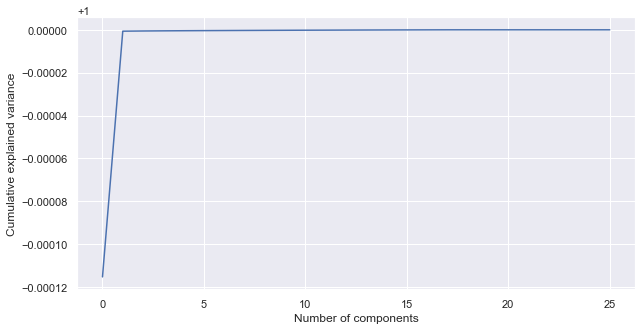

In [71]:
pca_regression = PCA().fit(feature_extraction_regression_df)

plt.plot(np.cumsum(pca_regression.explained_variance_ratio_))

plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');

##### Show component in table

In [72]:
pca_regression = PCA()

X_pca_regression = pca_regression.fit_transform(feature_extraction_regression_df)

component_names  = [f"PC{i+1}" for i in range(X_pca_regression.shape[1])]
X_pca_regression = pd.DataFrame(X_pca_regression, columns=component_names)

X_pca_regression.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26
0,-1999.643303,-22.599599,0.079289,1.148088,-0.557714,0.026282,0.136549,0.429761,0.547036,-0.064242,-0.397148,-0.748000,-0.078840,0.000577,-0.359363,0.064007,-0.077182,-0.073874,0.286627,-2.912834e-13,-3.607087e-14,1.078022e-13,2.039240e-14,3.903581e-13,1.058015e-13,-3.494029e-13
1,-93.041436,-10.164083,1.192514,-0.298967,0.666384,-0.027029,0.561820,-0.140771,0.197705,0.864812,0.099549,0.625727,0.716478,0.067738,-0.347287,-0.462819,0.160200,-0.433486,-0.078686,-1.815070e-13,1.216215e-12,3.650188e-12,-1.927312e-13,2.802287e-14,1.228748e-14,-3.023246e-13
2,-1921.611522,0.787148,0.807092,0.522918,0.279671,-1.146882,-0.126911,-0.047967,-0.010075,0.688507,-0.416017,-0.136662,-0.218863,-0.084838,0.146242,-0.774899,0.112533,0.022167,-0.094842,5.895442e-12,9.110803e-12,-3.404840e-12,3.917982e-12,1.845046e-11,-2.295266e-12,-1.041279e-13
3,-125.952669,-24.551028,1.342936,-0.051736,0.560543,0.028530,0.012280,-0.253280,0.980466,0.022842,0.548711,0.772349,0.583476,-0.171945,-0.050372,0.244764,0.051651,0.301279,0.316160,-3.468724e-12,-6.117036e-12,1.740427e-12,1.289370e-11,3.714963e-12,1.603864e-11,5.233780e-13
4,-1887.783355,17.403645,-0.621658,0.114716,-0.533287,0.036247,0.164716,0.214906,0.255165,-0.078733,-0.148154,0.284410,-0.034086,-0.375748,0.069723,-0.000731,-0.072173,-0.193614,0.060446,2.022173e-12,6.083730e-12,-1.503838e-12,1.715055e-11,-8.665609e-12,-8.855603e-12,5.856290e-14


##### Factor Loading

In [73]:
factor_loadings = pd.DataFrame(
    pca_regression.components_.T,
    
    columns = component_names,
    index   = feature_extraction_regression_df.columns,
)

factor_loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26
gender,4.342804e-06,-3.801459e-04,-4.456122e-02,2.261082e-02,9.672703e-01,-2.295479e-01,-6.321962e-02,1.350219e-02,3.171669e-02,-4.861361e-02,-1.884278e-02,4.053912e-04,-1.686458e-02,-4.841092e-03,1.132031e-02,-9.080708e-03,5.021222e-03,2.739695e-02,1.054446e-03,-0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,-3.939866e-16
senior_citizen,1.392473e-05,3.360149e-03,-1.537474e-01,1.239494e-01,-1.959015e-02,-6.064294e-02,-7.838329e-02,4.313411e-02,-3.139712e-02,2.331256e-02,2.082177e-01,-8.174868e-02,3.879108e-01,7.379336e-01,4.340179e-01,6.693920e-02,8.168746e-02,4.905246e-02,-2.005650e-02,2.183128e-15,7.080719e-16,5.935461e-16,2.468292e-16,-7.316095e-17,-9.597466e-17,-1.826887e-15
partner,1.734723e-18,-2.220446e-16,-1.804112e-16,7.025630e-17,2.775558e-17,-2.636780e-16,2.735659e-15,-2.236492e-15,-1.203898e-15,5.585810e-16,1.766816e-15,7.736054e-16,-1.483189e-15,-1.199128e-15,-3.483325e-15,1.866562e-15,-4.861563e-16,-2.175343e-15,-1.984090e-16,6.560456e-01,1.600488e-01,-3.368574e-03,2.612795e-04,-7.677827e-03,-6.630035e-03,-7.374783e-01
dependents,-2.646978e-23,-0.000000e+00,-1.110223e-16,5.551115e-17,-0.000000e+00,-0.000000e+00,1.942890e-16,-1.249001e-16,-2.775558e-17,1.110223e-16,2.775558e-17,1.105886e-16,2.775558e-17,-1.734723e-16,9.714451e-17,-1.387779e-16,9.020562e-17,-5.551115e-17,7.979728e-17,5.643989e-03,-1.074465e-02,7.048304e-02,6.689710e-01,7.174719e-01,-1.805163e-01,-3.242656e-03
phone_service,3.944305e-31,-0.000000e+00,0.000000e+00,3.469447e-18,-2.775558e-17,-5.551115e-17,1.110223e-16,1.734723e-16,1.249001e-16,8.326673e-17,5.551115e-17,-5.551115e-17,-8.326673e-17,-8.326673e-17,-4.163336e-17,0.000000e+00,-8.326673e-17,2.220446e-16,1.942890e-16,-3.465644e-03,-5.446112e-03,6.525423e-02,6.085179e-01,-6.767512e-01,-4.091129e-01,6.376224e-03
multiple_lines,0.000000e+00,-0.000000e+00,-5.551115e-17,-0.000000e+00,2.775558e-17,1.110223e-16,-3.053113e-16,-2.081668e-17,4.163336e-17,9.714451e-17,1.873501e-16,-7.925518e-17,-2.775558e-17,1.561251e-17,-1.387779e-17,-6.938894e-17,1.804112e-16,-2.220446e-16,1.804112e-16,5.323497e-03,-3.758799e-03,4.216984e-02,4.135457e-01,-1.648048e-01,8.944230e-01,-2.451393e-03
online_security,7.537553e-05,2.213574e-04,3.158327e-01,6.970193e-02,-4.834265e-02,-2.013034e-01,2.164711e-01,1.141587e-02,1.384459e-01,-5.895248e-02,-5.375555e-02,4.063782e-01,-5.168778e-02,1.592436e-01,1.525579e-02,-6.142151e-01,1.499424e-01,4.168976e-01,1.142640e-01,1.000712e-16,-3.401818e-16,-7.196919e-16,-9.931499e-17,-2.414878e-16,8.559452e-17,-2.317138e-15
online_backup,1.038872e-04,2.493911e-03,1.633172e-01,1.232481e-01,-6.046916e-02,-2.498386e-01,7.333256e-02,1.648482e-01,2.391997e-01,2.159265e-01,-1.597305e-02,-7.981115e-01,-1.061222e-01,-1.199617e-01,1.489345e-01,-1.458841e-01,-6.764559e-03,2.018689e-01,9.225902e-02,6.398462e-16,1.933352e-16,-2.592375e-16,-9.392037e-17,5.898954e-17,-1.127995e-16,-1.862870e-15
device_protection,1.045747e-04,3.607906e-03,2.180893e-01,5.955532e-02,6.051288e-02,1.751102e-01,-5.100152e-02,-6.339973e-02,-1.450969e-01,-4.755917e-02,9.379021e-02,-9.763007e-02,8.259703e-01,-3.492358e-01,-1.385175e-01,-9.236486e-02,3.610380e-02,1.630704e-01,8.050830e-02,1.545735e-16,-4.670149e-16,-4.116684e-16,-1.118519e-16,1.594292e-16,1.477653e-16,-9.100153e-16
tech_support,8.058018e-05,7.500237e-04,3.523030e-01,3.694640e-02,-5.840785e-03,-1.889900e-02,4.415277e-02,1.330630e-02,-4.962141e-03,-6.787452e-02,-1.888750e-01,1.883455e-01,-5.729090e-02,-1.266351e-01,3.998285e-01,6.224187e-01,-1.444573e-01,4.441496e-01,1.072217e-01,-7.012332e-16,-3.045753e-16,-4.396863e-16,1.328266e-16,-3.381354e-17,9.298814e-17,-2.181944e-15


##### Concate PCA value with target tenure

In [74]:
PCA_regression_df = pd.concat([X_pca_regression, new_feature_df['tenure']], axis=1)
PCA_regression_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,tenure
0,-1999.643303,-22.599599,0.079289,1.148088,-0.557714,0.026282,0.136549,0.429761,0.547036,-0.064242,-0.397148,-0.748000,-0.078840,0.000577,-0.359363,0.064007,-0.077182,-0.073874,0.286627,-2.912834e-13,-3.607087e-14,1.078022e-13,2.039240e-14,3.903581e-13,1.058015e-13,-3.494029e-13,1
1,-93.041436,-10.164083,1.192514,-0.298967,0.666384,-0.027029,0.561820,-0.140771,0.197705,0.864812,0.099549,0.625727,0.716478,0.067738,-0.347287,-0.462819,0.160200,-0.433486,-0.078686,-1.815070e-13,1.216215e-12,3.650188e-12,-1.927312e-13,2.802287e-14,1.228748e-14,-3.023246e-13,34
2,-1921.611522,0.787148,0.807092,0.522918,0.279671,-1.146882,-0.126911,-0.047967,-0.010075,0.688507,-0.416017,-0.136662,-0.218863,-0.084838,0.146242,-0.774899,0.112533,0.022167,-0.094842,5.895442e-12,9.110803e-12,-3.404840e-12,3.917982e-12,1.845046e-11,-2.295266e-12,-1.041279e-13,2
3,-125.952669,-24.551028,1.342936,-0.051736,0.560543,0.028530,0.012280,-0.253280,0.980466,0.022842,0.548711,0.772349,0.583476,-0.171945,-0.050372,0.244764,0.051651,0.301279,0.316160,-3.468724e-12,-6.117036e-12,1.740427e-12,1.289370e-11,3.714963e-12,1.603864e-11,5.233780e-13,45
4,-1887.783355,17.403645,-0.621658,0.114716,-0.533287,0.036247,0.164716,0.214906,0.255165,-0.078733,-0.148154,0.284410,-0.034086,-0.375748,0.069723,-0.000731,-0.072173,-0.193614,0.060446,2.022173e-12,6.083730e-12,-1.503838e-12,1.715055e-11,-8.665609e-12,-8.855603e-12,5.856290e-14,2


##### Save PCA Value

In [75]:
PCA_regression_df.to_csv('../datasets/oversampling/PCA_regression.csv', index=False)

## Feature Selection

In [76]:
feature_selection_df = new_feature_df

### Pearson Correlation

<AxesSubplot:>

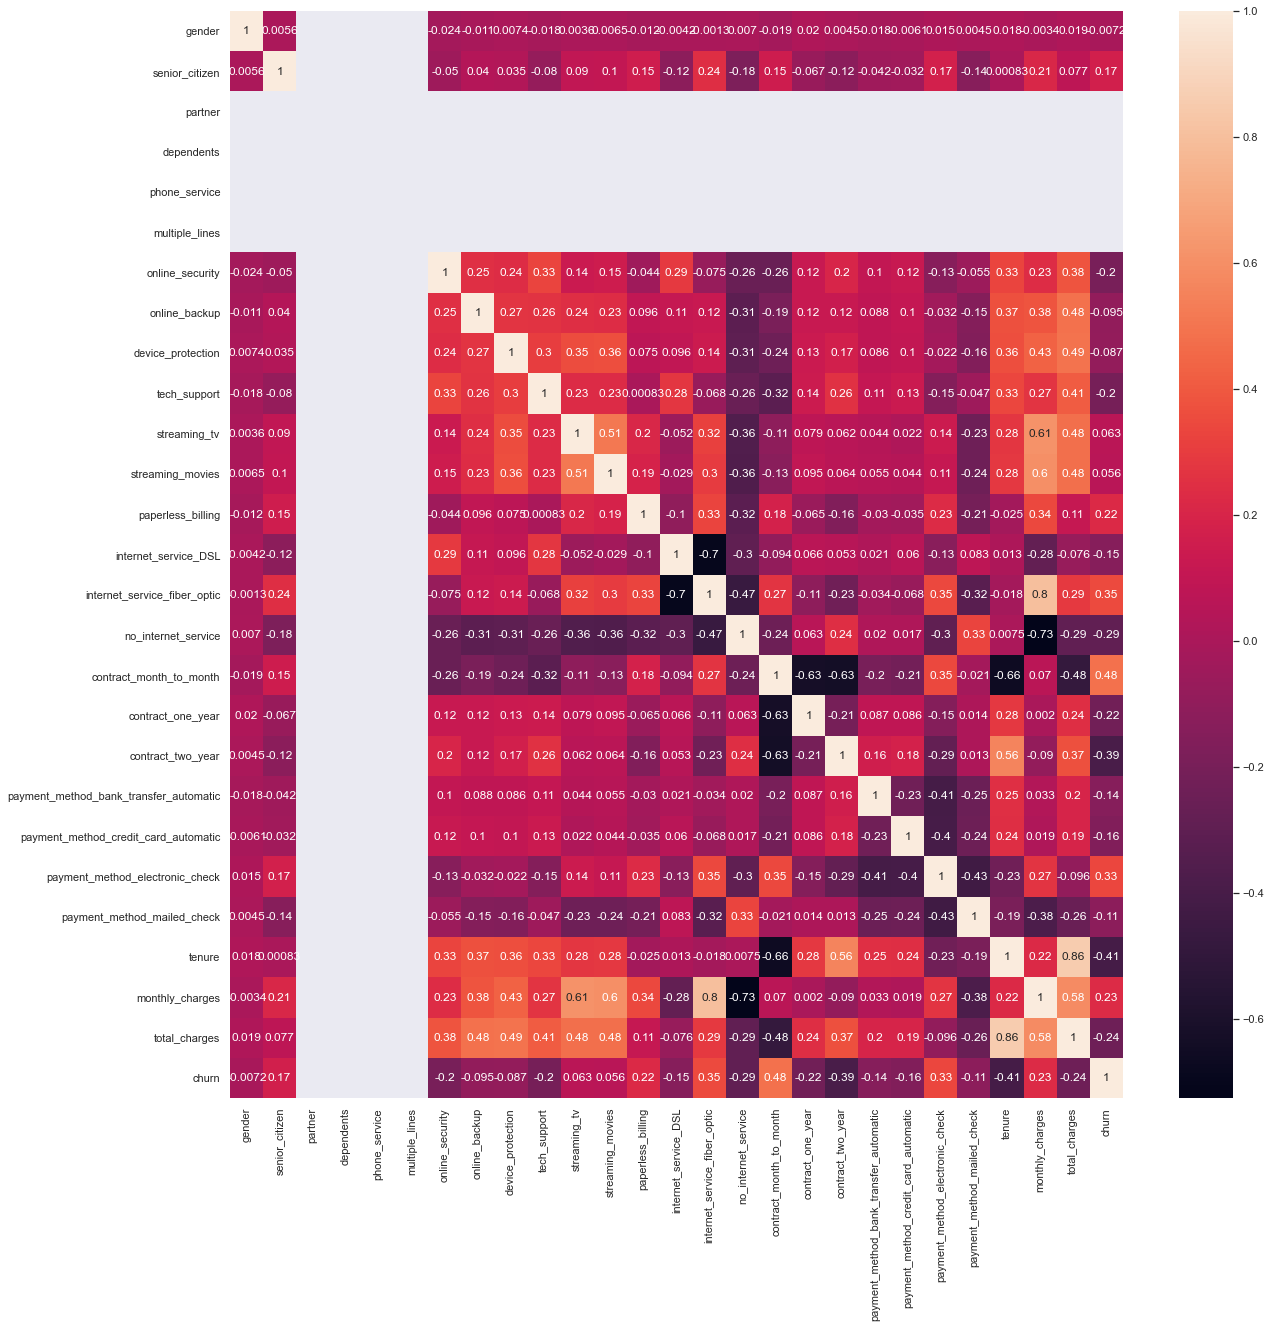

In [77]:
sns.set(rc={'figure.figsize':(20, 20)})
sns.heatmap(feature_selection_df.corr(), annot=True)

### Spearman Correlation (Non-Linier)

<AxesSubplot:>

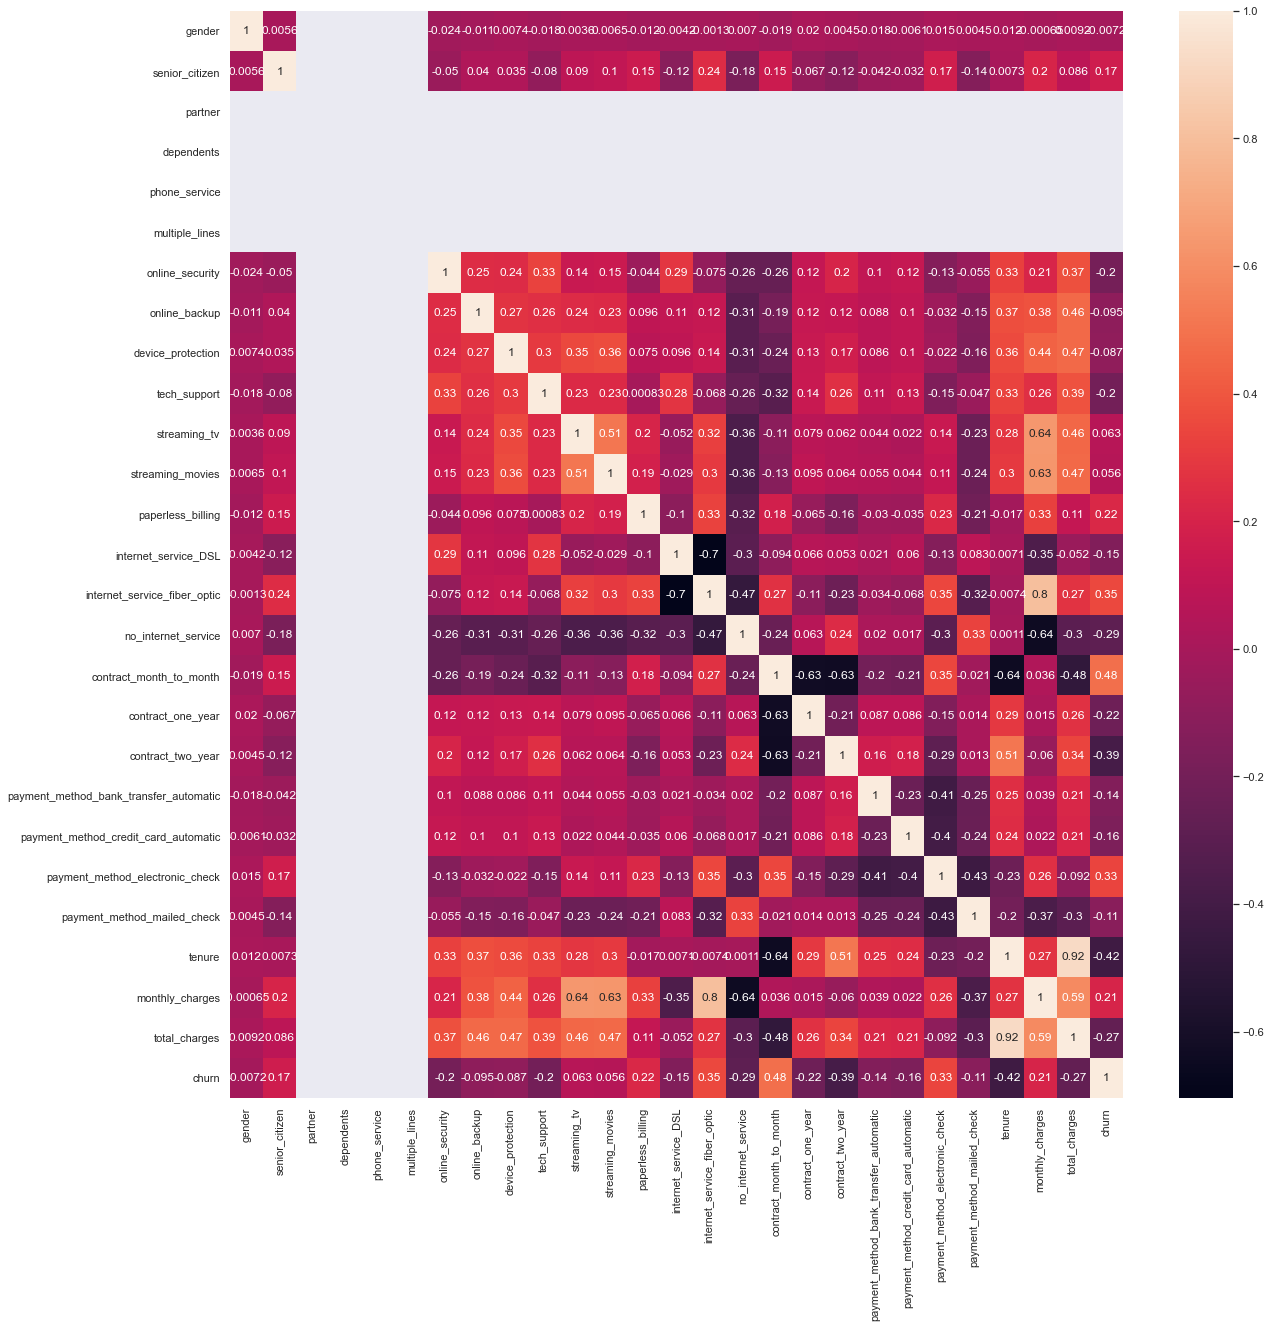

In [78]:
sns.heatmap(feature_selection_df.corr('spearman'), annot=True)

### Seleksi fitur untuk klasifikasi dengan target churn

#### Mutual Information
Dipilih lima fitur yang berada pada peringkat teratas, yaitu no_internet_service, payment_method_mailed_check, contract_one_year, monthly_charges, dan tenure.

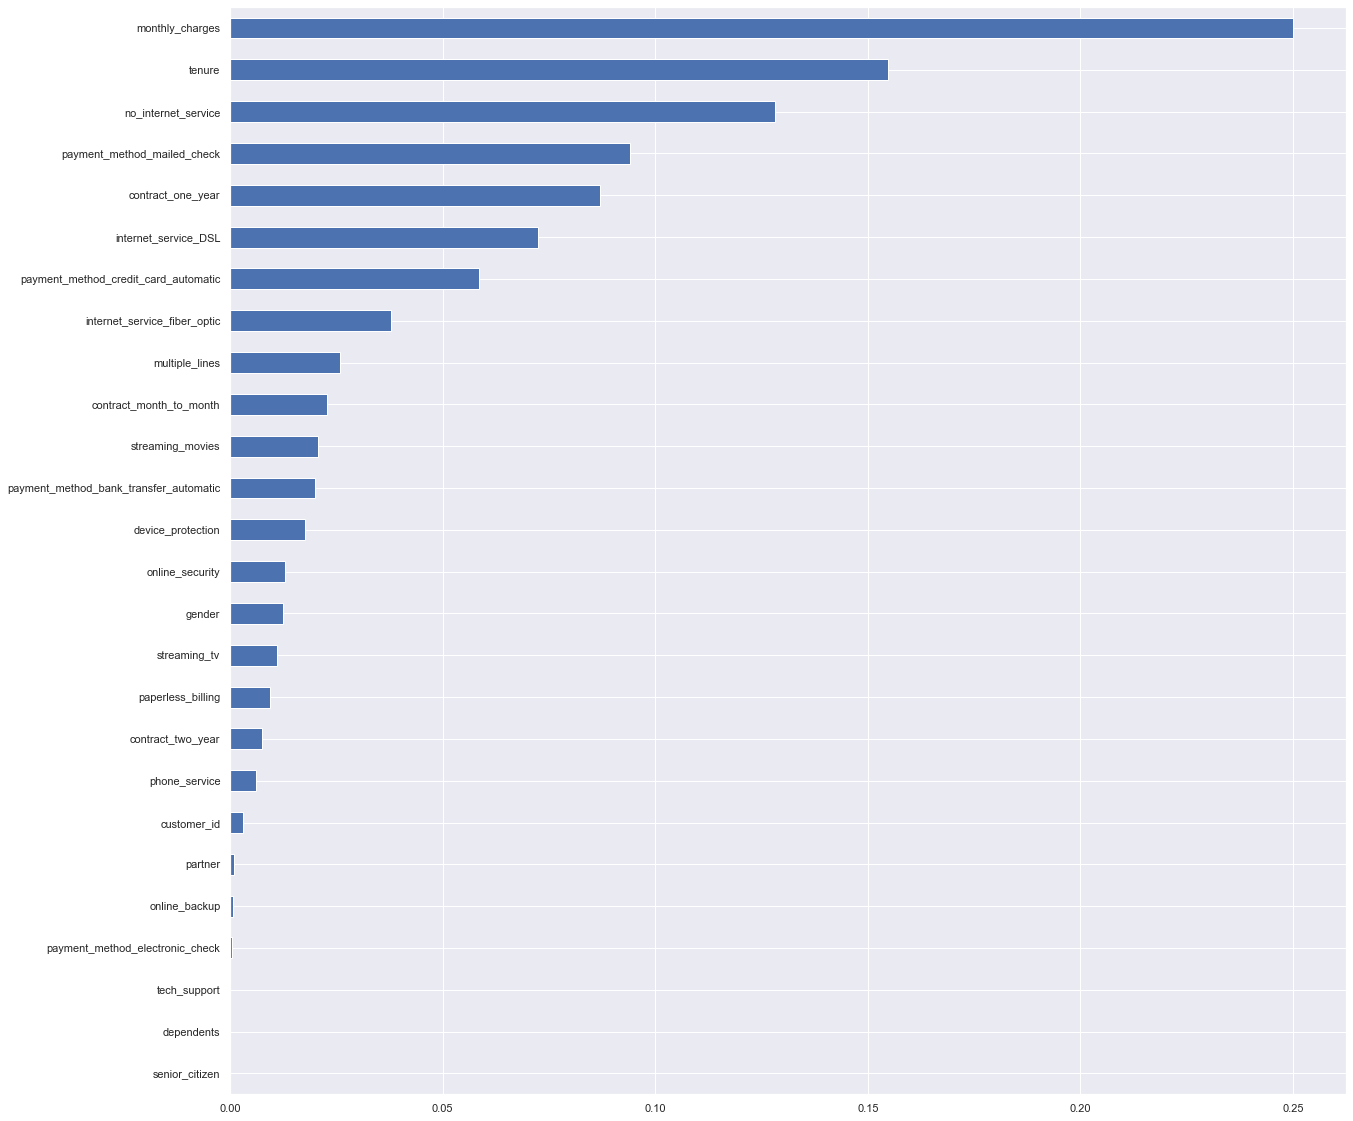

In [79]:
X = new_feature_df.iloc[:, 1:27]
y = new_feature_df.iloc[:, 27:28]
importance = mutual_info_classif(X, np.ravel(y))

feat_importance = pd.Series(importance, new_feature_df.columns[0:26])
feat_importance.sort_values(ascending=True).plot(kind='barh')
plt.show()

#### Seleksi fitur

In [80]:
feature_selection_classification_df = new_feature_df[['monthly_charges',
                                                      'tenure',
                                                      'no_internet_service',
                                                      'payment_method_mailed_check',
                                                      'contract_one_year',
                                                      'churn']]

In [81]:
feature_selection_classification_df.head()

,monthly_charges,tenure,no_internet_service,payment_method_mailed_check,contract_one_year,churn
0,29.85,1,0.0,0.0,0.0,0
1,56.95,34,0.0,1.0,1.0,0
2,53.85,2,0.0,1.0,0.0,1
3,42.30,45,0.0,0.0,1.0,0
4,70.70,2,0.0,0.0,0.0,1


#### Save feature selection

In [82]:
feature_selection_classification_df.to_csv('../datasets/oversampling/feature_engineering_classification_telco_customer_churn.csv', index=False)

### Seleksi fitur untuk regresi dengan target tenure

#### Mutual Information
Dipilih lima fitur yang berada pada peringkat teratas, yaitu total_charges, contract_month_to_month, contract_two_year, monthly_charges, dan device_protection.

In [83]:
X = new_feature_df.loc[:, ['gender', 'senior_citizen', 'partner', 'dependents',
                           'phone_service', 'multiple_lines', 'online_security', 'online_backup',
                           'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
                           'paperless_billing', 'internet_service_DSL',
                           'internet_service_fiber_optic', 'no_internet_service',
                           'contract_month_to_month', 'contract_one_year', 'contract_two_year',
                           'payment_method_bank_transfer_automatic',
                           'payment_method_credit_card_automatic',
                           'payment_method_electronic_check', 'payment_method_mailed_check',
                           'monthly_charges', 'total_charges', 'churn']
                          ]

y = new_feature_df.loc[:, 'tenure']

discrete_features = X.dtypes == int

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)

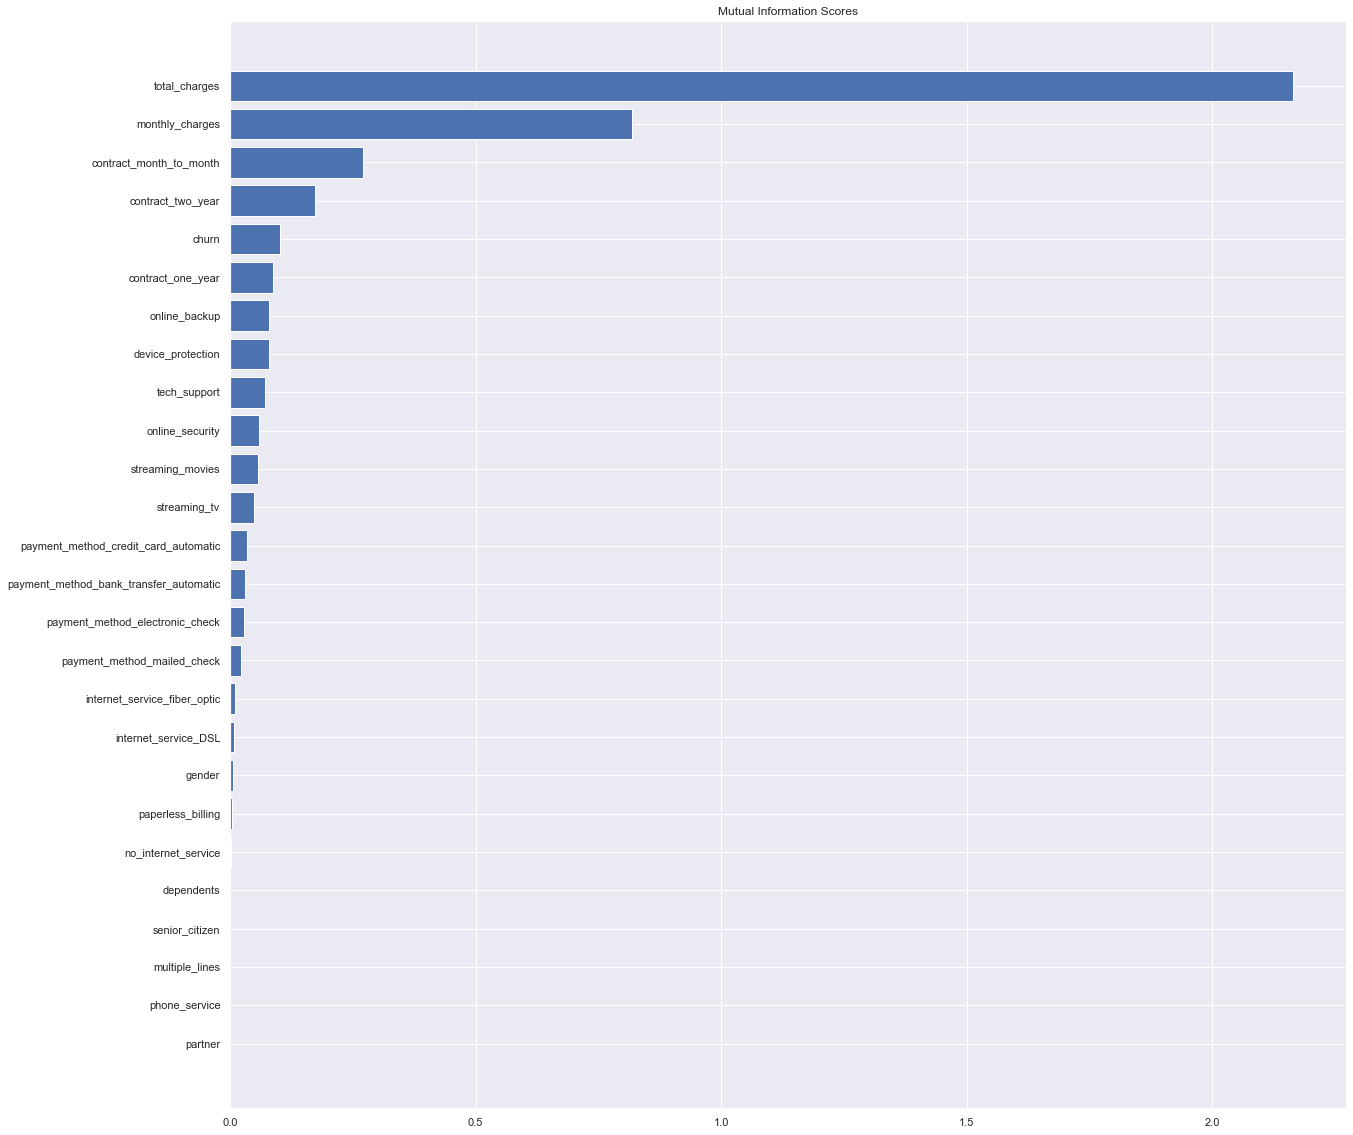

In [84]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

plt.figure()
plot_mi_scores(mi_scores)

#### Seleksi fitur

In [85]:
feature_selection_regression_df = new_feature_df[['total_charges',
                                                  'monthly_charges',
                                                  'contract_month_to_month',
                                                  'contract_two_year',
                                                  'churn',
                                                  'tenure']]

In [86]:
feature_selection_regression_df.head()

,total_charges,monthly_charges,contract_month_to_month,contract_two_year,churn,tenure
0,29.85,29.85,1.0,0.0,0,1
1,1936.30,56.95,0.0,0.0,0,34
2,107.70,53.85,1.0,0.0,1,2
3,1903.50,42.30,0.0,0.0,0,45
4,141.40,70.70,1.0,0.0,1,2


#### Save feature selection

In [87]:
feature_selection_regression_df.to_csv('../datasets/oversampling/feature_engineering_regression_telco_customer_churn.csv', index=False)

# Split dataset

## EDA


### Split feature and target

In [88]:
EDA_df = pd.read_csv('../datasets/oversampling/EDA_telco_customer_churn.csv')
X_EDA = EDA_df.iloc[:, 0:27]
y_EDA = EDA_df.iloc[:, 27:28]

X_EDA_train, X_EDA_test, y_EDA_train, y_EDA_test = train_test_split(X_EDA, y_EDA, test_size=0.2, random_state=42)

### Show composition train and test dataset

In [89]:
print(f'Train dataset')
print(f'X_EDA_train: {X_EDA_train.shape}')
print(f'y_EDA_train: {y_EDA_train.shape}')

print(f'\nTest dataset')
print(f'X_EDA_test: {X_EDA_test.shape}')
print(f'y_EDA_test: {y_EDA_test.shape}')

Train dataset
X_EDA_train: (8278, 27)
y_EDA_train: (8278, 1)

Test dataset
X_EDA_test: (2070, 27)
y_EDA_test: (2070, 1)


### Concate X_train and y_train / X_test and y_test

In [90]:
EDA_train_df = pd.concat([X_EDA_train, y_EDA_train], axis=1)
EDA_test_df  = pd.concat([X_EDA_test, y_EDA_test], axis=1)

### Save train and test dataset

In [91]:
EDA_train_df.to_csv('../datasets/oversampling/train/EDA_train.csv', index=False)
EDA_test_df.to_csv('../datasets/oversampling/test/EDA_test.csv', index=False)

## Feature Engineering

### Classification model

#### Split dataset to X and y

In [92]:
feature_engineering_classification = pd.read_csv('../datasets/oversampling/feature_engineering_classification_telco_customer_churn.csv')
X = feature_engineering_classification.iloc[:, 0:5]
y = feature_engineering_classification.iloc[:, 5:6]

X_feature_engineering_classification_train, X_feature_engineering_classification_test, y_feature_engineering_classification_train, y_feature_engineering_classification_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Show composition train and test dataset

In [93]:
print(f'Train dataset')
print(f'X_feature_engineering_train: {X_feature_engineering_classification_train.shape}')
print(f'y_feature_engineering_train: {y_feature_engineering_classification_train.shape}')

print(f'\nTest dataset')
print(f'X_feature_engineering_test: {X_feature_engineering_classification_test.shape}')
print(f'y_feature_engineering_test: {y_feature_engineering_classification_test.shape}')

Train dataset
X_feature_engineering_train: (8278, 5)
y_feature_engineering_train: (8278, 1)

Test dataset
X_feature_engineering_test: (2070, 5)
y_feature_engineering_test: (2070, 1)


#### Concate X_train and y_train / X_test and y_test

In [94]:
feature_engineering_classification_train_df = pd.concat([X_feature_engineering_classification_train, y_feature_engineering_classification_train], axis=1)
feature_engineering_classification_test_df  = pd.concat([X_feature_engineering_classification_test, y_feature_engineering_classification_test], axis=1)

#### Save train and test dataset

In [95]:
feature_engineering_classification_train_df.to_csv('../datasets/oversampling/train/feature_engineering_classification_train.csv', index=False)
feature_engineering_classification_test_df.to_csv('../datasets/oversampling/test/feature_engineering_classification_test.csv', index=False)

### Regression Model

#### Split dataset to X and y

In [96]:
feature_engineering_regression = pd.read_csv('../datasets/oversampling/feature_engineering_regression_telco_customer_churn.csv')
X = feature_engineering_regression.iloc[:, 0:5]
y = feature_engineering_regression.iloc[:, 5:6]

X_feature_engineering_regression_train, X_feature_engineering_regression_test, y_feature_engineering_regression_train, y_feature_engineering_regression_test = train_test_split(X, y, test_size=0.2, random_state=42)

####  Show composition train and test dataset

In [97]:
print(f'Train dataset')
print(f'X_feature_engineering_train: {X_feature_engineering_regression_train.shape}')
print(f'y_feature_engineering_train: {y_feature_engineering_regression_train.shape}')

print(f'\nTest dataset')
print(f'X_feature_engineering_test: {X_feature_engineering_regression_test.shape}')
print(f'y_feature_engineering_test: {y_feature_engineering_regression_test.shape}')

Train dataset
X_feature_engineering_train: (8278, 5)
y_feature_engineering_train: (8278, 1)

Test dataset
X_feature_engineering_test: (2070, 5)
y_feature_engineering_test: (2070, 1)


#### Concate X_train and y_train / X_test and y_test

In [98]:
feature_engineering_regression_train_df = pd.concat([X_feature_engineering_regression_train, y_feature_engineering_regression_train], axis=1)
feature_engineering_regression_test_df  = pd.concat([X_feature_engineering_regression_test, y_feature_engineering_regression_test], axis=1)

#### Save train and test dataset

In [99]:
feature_engineering_regression_train_df.to_csv('../datasets/oversampling/train/feature_engineering_regression_train.csv', index=False)
feature_engineering_regression_test_df.to_csv('../datasets/oversampling/test/feature_engineering_regression_test.csv', index=False)

## PCA

### Classification model

In [100]:
PCA_classification_df = pd.read_csv('../datasets/oversampling/PCA_classification.csv')
X_PCA_classification  = PCA_classification_df.iloc[:, 0:26]
y_PCA_classification  = PCA_classification_df.iloc[:, 26:27]

X_PCA_classification_train, X_PCA_classification_test, y_PCA_classification_train, y_PCA_classification_test = train_test_split(X_PCA_classification, y_PCA_classification, test_size=0.2, random_state=42)

#### Show composition train and test dataset

In [101]:
print(f'Train dataset')
print(f'X_EDA_train: {X_PCA_classification_train.shape}')
print(f'y_EDA_train: {y_PCA_classification_train.shape}')

print(f'\nTest dataset')
print(f'X_EDA_test: {X_PCA_classification_test.shape}')
print(f'y_EDA_test: {y_PCA_classification_test.shape}')

Train dataset
X_EDA_train: (8278, 26)
y_EDA_train: (8278, 1)

Test dataset
X_EDA_test: (2070, 26)
y_EDA_test: (2070, 1)


#### Concate X_train and y_train / X_test and y_test

In [102]:
PCA_classification_train_df = pd.concat([X_PCA_classification_train, y_PCA_classification_train], axis=1)
PCA_classification_test_df  = pd.concat([X_PCA_classification_test, y_PCA_classification_test], axis=1)

#### Save train and test dataset

In [103]:
PCA_classification_train_df.to_csv('../datasets/oversampling/train/PCA_classification_train.csv', index=False)
PCA_classification_test_df.to_csv('../datasets/oversampling/test/PCA_classification_test.csv', index=False)

### Regression Model

In [104]:
PCA_regression_df = pd.read_csv('../datasets/oversampling/PCA_regression.csv')
X_PCA_regression  = PCA_regression_df.iloc[:, 0:26]
y_PCA_regression  = PCA_regression_df.iloc[:, 26:27]

X_PCA_regression_train, X_PCA_regression_test, y_PCA_regression_train, y_PCA_regression_test = train_test_split(X_PCA_regression, y_PCA_regression, test_size=0.2, random_state=42)

#### Show composition train and test dataset

In [105]:
print(f'Train dataset')
print(f'X_EDA_train: {X_PCA_regression_train.shape}')
print(f'y_EDA_train: {y_PCA_regression_train.shape}')

print(f'\nTest dataset')
print(f'X_EDA_test: {X_PCA_regression_test.shape}')
print(f'y_EDA_test: {y_PCA_regression_test.shape}')

Train dataset
X_EDA_train: (8278, 26)
y_EDA_train: (8278, 1)

Test dataset
X_EDA_test: (2070, 26)
y_EDA_test: (2070, 1)


#### Concate X_train and y_train / X_test and y_test

In [106]:
PCA_regression_train_df = pd.concat([X_PCA_regression_train, y_PCA_regression_train], axis=1)
PCA_regression_test_df  = pd.concat([X_PCA_regression_test, y_PCA_regression_test], axis=1)

#### Save train and test dataset

In [107]:
PCA_regression_train_df.to_csv('../datasets/oversampling/train/PCA_regression_train.csv', index=False)
PCA_regression_test_df.to_csv('../datasets/oversampling/test/PCA_regression_test.csv', index=False)